In [1]:
# winequality-white.csv 데이터셋으로 실습 (딥러닝, 와인 품질 예측)
!pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# -----------------------------
# 1) 데이터 준비
# -----------------------------

# 구분자가 세미콜론(;)이므로 sep=';' 옵션을 추가
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/machine-learning-practice/Machine-Learning-Programming/week4/data/winequality-white.csv", sep=';')

# 결측치 확인
print("결측치 확인:\n", df.isnull().sum())

# 결측치가 있는 행이 있다면 제거
df = df.dropna()

# 타겟 변수인 'quality'의 분포를 확인
print("와인 품질 분포:\n", df["quality"].value_counts())

결측치 확인:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
와인 품질 분포:
 quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64


In [4]:
# 'quality' 열을 제외한 모든 열을 X로 사용
X = df.drop(columns=["quality"])
# 'quality' 열을 y로 사용
y = df["quality"]

In [5]:
#데이터 정규화
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [6]:
# one-hot encoding
Y = pd.get_dummies(y).values
# X = X.values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=0
)

print("데이터 형태 확인:")
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

데이터 형태 확인:
(3918, 11) (980, 11) (3918, 7) (980, 7)


In [15]:
# -----------------------------
# 2) 모델 구성
# -----------------------------

model = models.Sequential([
    layers.Dense(64, activation="relu", input_shape=(X.shape[1],)),
    # layers.Dropout(0.3),
    layers.Dense(32, activation="relu"),
    layers.Dense(Y.shape[1], activation="softmax")   # 클래스 수 맞춤
])

In [16]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",   # one-hot이면 categorical_crossentropy
    metrics=["accuracy"]
)

In [17]:
# -----------------------------
# 3) 모델 학습
# -----------------------------
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)

Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3498 - loss: 1.5871 - val_accuracy: 0.5268 - val_loss: 1.1711
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5185 - loss: 1.1819 - val_accuracy: 0.5434 - val_loss: 1.1089
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5444 - loss: 1.0965 - val_accuracy: 0.5625 - val_loss: 1.0693
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5410 - loss: 1.1187 - val_accuracy: 0.5587 - val_loss: 1.0596
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5534 - loss: 1.0809 - val_accuracy: 0.5561 - val_loss: 1.0446
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5640 - loss: 1.0636 - val_accuracy: 0.5638 - val_loss: 1.0375
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5485 - loss: 1.0636 - val_accuracy: 0.5523 - val_loss: 1.0281
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5384 - loss: 1.0644 - val_accuracy: 0.

In [11]:
# -----------------------------
# 4) 예측결과 생성
# -----------------------------
y_pred = model.predict(X_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [12]:
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

In [13]:
# 학습 곡선
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

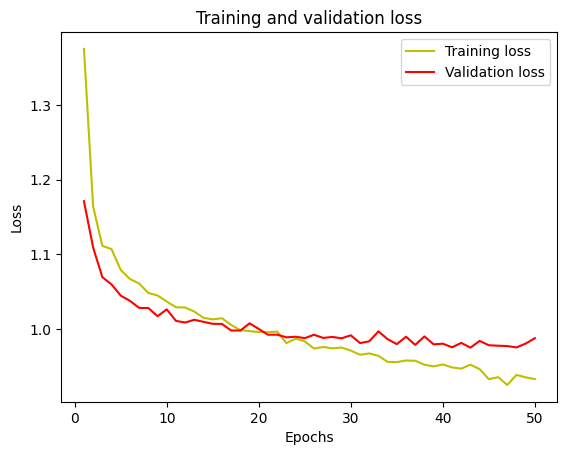

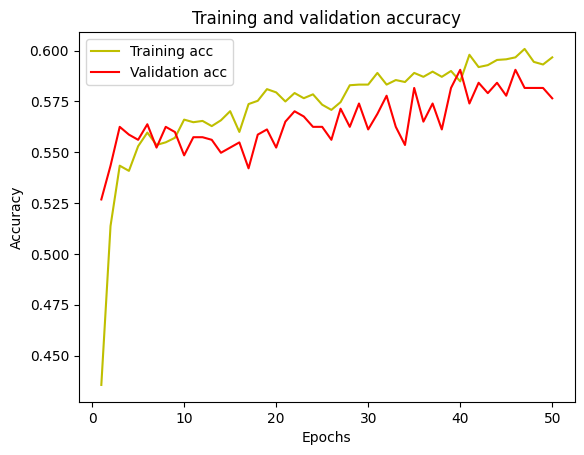

In [18]:
# -----------------------------
# 5) 모델 평가 (손실도, 정확도)
# -----------------------------

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [82]:
#예측 값에 대한 정확도 확인
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.73      0.16      0.26        51
           2       0.58      0.61      0.59       295
           3       0.53      0.64      0.58       409
           4       0.51      0.45      0.48       183
           5       0.33      0.03      0.06        33

    accuracy                           0.54       980
   macro avg       0.45      0.31      0.33       980
weighted avg       0.54      0.54      0.52       980

[[  0   0   6   2   1   0]
 [  0   8  27  15   1   0]
 [  0   2 179 106   8   0]
 [  0   0  87 262  58   2]
 [  0   0   9  92  82   0]
 [  0   1   2  17  12   1]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
